# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [40]:
import pandas as pd
import pandas as pd
import requests
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix 
from sklearn.metrics import balanced_accuracy_score

In [63]:
import seaborn as sns
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
linreg= LinReg()
linreg.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [11]:
print('R2 - Coeficiente de Determinacion del train', metrics.r2_score(y_train, y_pred_train))
print('R2 - Coeficiente de Determinacion del test', metrics.r2_score(y_test, y_pred_test))

R2 - Coeficiente de Determinacion del train 0.7323323182503965
R2 - Coeficiente de Determinacion del test 0.7636418543566299


## 4. Calculate and print mean squared error for both the training and the testing set.

In [12]:
print('MSE - Error Cuadratico Medio del train', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE - Error Cuadratico Medio del test', metrics.mean_squared_error(y_test, y_pred_test))

MSE - Error Cuadratico Medio del train 22.94404158296301
MSE - Error Cuadratico Medio del test 18.585926003956246


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [13]:
print('MAE - Error Medio Absoluto', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE - Error Medio Absoluto', metrics.mean_absolute_error(y_test, y_pred_test))

MAE - Error Medio Absoluto 3.3886118270763723
MAE - Error Medio Absoluto 3.0955585760222517


## Classification Model Evaluation

In [21]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [45]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/home/cleonortiz/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

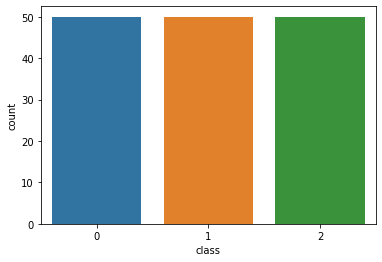

In [65]:
sns.countplot(data['class'])

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [49]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [50]:
y_train = pd.Series(y_train['class'])

In [51]:
log = LogisticRegression()

log.fit(X_train, y_train)

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
X_train.shape

(120, 4)

In [53]:
y_train.shape

(120,)

In [54]:
y_pred_train = log.predict(X_train)
y_pred_test= log.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [55]:
acc_y_train= accuracy_score(y_train, y_pred_train)
acc_y_test = accuracy_score(y_test,y_pred_test)
print('Accuracy score y_pred_train :', acc_y_train)
print('Accuracy score y_pred_test :', acc_y_test)

Accuracy score y_pred_train : 0.975
Accuracy score y_pred_test : 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [56]:
bacc_y_train= balanced_accuracy_score(y_train, y_pred_train)
bacc_y_test = balanced_accuracy_score(y_test,y_pred_test)
print('Balanced accuracy score y_pred_train :', bacc_y_train)
print('Balanced accuracy score y_pred_test :', bacc_y_test)

Balanced accuracy score y_pred_train : 0.9742300439974859
Balanced accuracy score y_pred_test : 0.9743589743589745


## 10. Calculate and print the precision score for both the training and the testing set.

In [57]:
prec_y_train= precision_score(y_train, y_pred_train, average='micro')
prec_y_test = precision_score(y_test,y_pred_test, average='micro')
print('Precision score y_pred_train :', prec_y_train)
print('Precision score y_pred_test :', prec_y_test)

Precision score y_pred_train : 0.9755892255892257
Precision score y_pred_test : 0.9583333333333334


## 11. Calculate and print the recall score for both the training and the testing set.

In [58]:
rec_y_train= recall_score(y_train, y_pred_train, average='micro')
rec_y_test = recall_score(y_test,y_pred_test, average='micro')
print('Recall score y_pred_train :', rec_y_train)
print('Recall score y_pred_test :', rec_y_test)

Recall score y_pred_train : 0.9742300439974859
Recall score y_pred_test : 0.9743589743589745


## 12. Calculate and print the F1 score for both the training and the testing set.

In [59]:
f1_y_train= f1_score(y_train, y_pred_train, average='micro')
f1_y_test = f1_score(y_test,y_pred_test, average='micro')
print('F1 score y_pred_train :', f1_y_train)
print('F1 score y_pred_test :', f1_y_test)

F1 score y_pred_train : 0.9748071169894507
F1 score y_pred_test : 0.9644444444444445


## 13. Generate confusion matrices for both the training and the testing set.

In [60]:
confusion_matrix(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 12]])

In [62]:
confusion_matrix(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 42,  1],
       [ 0,  2, 35]])

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.